In [5]:
import pickle
import pandas as pd

In [2]:
df_docs_outside = pickle.load(open("df_docs_outside.pickle", "rb"))
weighted_cluster_1 = pickle.load(open("weighted_cluster_1.pickle", "rb"))
weighted_cluster_2 = pickle.load(open("weighted_cluster_2.pickle", "rb"))
weighted_cluster_3 = pickle.load(open("weighted_cluster_3.pickle", "rb"))

In [7]:
df_docs_outside

,id,Title,Abstract,Author Keywords,Index Keywords,Year,Authors,label,url,x,...,cluster,weights,scores,DOI,Citations,Links,doc,preprocess,doc_clean,matching
0,1,Can positive expectations help to improve the ...,"Background: Risk literacy, i.e., the ability t...",Expectation; Framing; Learning barriers; Place...,controlled study; human; learning; literacy; m...,2022,"Benson S., Schmidt K., Kleine-Borgmann J., Her...",benson s. (2022),https://doi.org/10.1186/s12909-022-03498-1,0.4976,...,0,"{'Links': 0.0, 'Citations': 0.0, 'Norm. citati...","{'Pub. year': 2022.0, 'Citations': 0.0, 'Norm....",10.1186/s12909-022-03498-1,0.0,0.0,Can positive expectations help to improve the ...,"{'doc_clean': ['positive', 'expectation', 'hel...","[positive, expectation, help, improve, learnin...","[(1, 0), (2, 1), (3, 2), (5, 3), (7, 4), (9, 5..."
1,2,Going beyond the AHA! moment: insight discover...,"In this paper, we develop and apply the concep...",,,2022,"Pearce B.B.J., Deutsch L., Fry P., Marafatto F...",pearce b.b.j. (2022),https://doi.org/10.1057/s41599-022-01129-0,-0.0418,...,0,"{'Links': 0.0, 'Citations': 0.0, 'Norm. citati...","{'Pub. year': 2022.0, 'Citations': 0.0, 'Norm....",10.1057/s41599-022-01129-0,0.0,0.0,Going beyond the AHA! moment: insight discover...,"{'doc_clean': ['go', 'aha', 'moment', 'insight...","[go, aha, moment, insight, discovery, transdis...","[(0, 0), (3, 1), (5, 2), (7, 3), (8, 4), (10, ..."
2,3,An online Delphi study to investigate the comp...,Background: Several competency frameworks are ...,Allied health disciplines; CanMEDS; Continuous...,article; audiology; Belgium; clinical article;...,2022,"Janssens O., Embo M., Valcke M., Haerens L.",janssens o. (2022),https://doi.org/10.1186/s12909-022-03308-8,-0.1715,...,0,"{'Links': 1.0, 'Citations': 0.0, 'Norm. citati...","{'Pub. year': 2022.0, 'Citations': 0.0, 'Norm....",10.1186/s12909-022-03308-8,0.0,1.0,An online Delphi study to investigate the comp...,"{'doc_clean': ['online', 'delphi', 'study', 'i...","[online, delphi, study, investigate, completen...","[(1, 0), (2, 1), (3, 2), (5, 3), (7, 4), (10, ..."
3,4,How do medical students learn conceptual knowl...,Background: Acquiring medical knowledge is a k...,Learning difficulties; Learning techniques; Me...,adult; article; controlled study; curriculum; ...,2022,"Franz A., Oberst S., Peters H., Berger R., Beh...",franz a. (2022),https://doi.org/10.1186/s12909-022-03283-0,0.5083,...,0,"{'Links': 0.0, 'Citations': 0.0, 'Norm. citati...","{'Pub. year': 2022.0, 'Citations': 0.0, 'Norm....",10.1186/s12909-022-03283-0,0.0,0.0,How do medical students learn conceptual knowl...,"{'doc_clean': ['medical', 'student', 'learn', ...","[medical, student, learn, conceptual, knowledg...","[(2, 0), (3, 1), (4, 2), (5, 3), (6, 4), (8, 5..."
4,5,How medical students co-regulate their learnin...,Background: Self-regulated learning is a key c...,Clinical clerkships; Co-regulated learning; Me...,clinical education; human; learning; medical e...,2022,"Bransen D., Driessen E.W., Sluijsmans D.M.A., ...",bransen d. (2022),https://doi.org/10.1186/s12909-022-03259-0,0.3363,...,0,"{'Links': 0.0, 'Citations': 0.0, 'Norm. citati...","{'Pub. year': 2022.0, 'Citations': 0.0, 'Norm....",10.1186/s12909-022-03259-0,0.0,0.0,How medical students co-regulate their learnin...,"{'doc_clean': ['medical', 'student', 'co', 're...","[medical, student, co, regulate, learning, cli...","[(1, 0), (2, 1), (3, 2), (5, 3), (7, 4), (9, 5..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
741,930,“Quality Management’ or “The Educative Workpla...,Competence-based education has been the topic ...,,,1992,Winter R.,winter r. (1992),https://doi.org/10.1080/0309877920160311,-0.0476,...,0,"{'Links': 2.0, 'Citations': 21.0, 'Norm. citat...","{'Pub. year': 1992.0, 'Citations': 21.0, 'Norm...",10.1080/0309877920160311,21.0,2.0,“Quality Management’ or “The Educative Workpla...,"{'doc_clean': ['quality', 'management', 'educa...","[quality, manag

In [6]:
weighted_cluster = pd.concat([weighted_cluster_1, weighted_cluster_2, weighted_cluster_3])
weighted_cluster

,id,Title,Abstract,Author Keywords,Index Keywords,Year,Authors,label,url,x,...,doc,preprocess,doc_clean,matching,topic_0,topic_2,topic_5,topic_3,topic_1,topic_4
0,0,"Students’ learning sustainability – implicit, ...",Purpose: This study aims to understand better ...,Higher education institutions (HEIs); Sustaina...,,2022,"Alm K., Beery T.H., Eiblmeier D., Fahmy T.",alm k. (2022),https://doi.org/10.1108/ijshe-12-2020-0484,-0.9452,...,"Students’ learning sustainability – implicit, ...","{'doc_clean': ['student', 'learn', 'implicit',...","[student, learn, implicit, explicit, non, exis...","[(0, 0), (2, 1), (5, 2), (7, 3), (9, 4), (11, ...",0.00000,0.000000,0.000000,0.000000,0.0,0.000000
1,7,Competence-based approaches in organizational ...,"With an increasing pace of digitalization, aut...",,,2022,Škrinjarić B.,škrinjarić b. (2022),https://doi.org/10.1057/s41599-022-01047-1,-0.5512,...,Competence-based approaches in organizational ...,"{'doc_clean': ['competence', 'base', 'approach...","[competence, base, approach, organizational, i...","[(0, 0), (2, 1), (3, 2), (5, 3), (7, 4), (8, 5...",0.44148,0.000000,0.000000,0.000000,0.0,0.000000
2,18,Developing key competencies in sustainability ...,Purpose: This research aims to investigate the...,Curriculum; Education for sustainable developm...,,2022,"Birdman J., Wiek A., Lang D.J.",birdman j. (2022),https://doi.org/10.1108/ijshe-12-2020-0506,-0.7762,...,Developing key competencies in sustainability ...,"{'doc_clean': ['develop', 'key', 'competency',...","[develop, key, competency, project, base, lear...","[(0, 0), (1, 1), (2, 2), (6, 3), (8, 4), (9, 5...",0.00000,0.322377,0.325058,0.000000,0.0,0.000000
3,19,Competencies of Sustainability Professionals: ...,This paper presents an empirical study on key ...,higher education; human resource management; k...,higher education; human resource; sustainabili...,2022,"Venn R., Perez P., Vandenbussche V.",venn r. (2022),https://doi.org/10.3390/su14094916,-0.4255,...,Competencies of Sustainability Professionals: ...,"{'doc_clean': ['competency', 'professionals', ...","[competency, professionals, empirical, study, ...","[(0, 0), (3, 1), (6, 2), (7, 3), (9, 4), (10, ...",0.00000,0.000000,0.000000,0.000000,0.0,0.000000
4,21,Coaching to prepare students for their school-...,Purpose: The present study proposes coaching a...,Coaching; Employability competences; Higher ed...,,2022,"van der Baan N., Gast I., Gijselaers W., Beaus...",van der baan n. (2022),https://doi.org/10.1108/et-11-2020-0341,0.2264,...,Coaching to prepare students for their school-...,"{'doc_clean': ['coach', 'prepare', 'student', ...","[coach, prepare, student, school, work, transi...","[(0, 0), (2, 1), (3, 2), (6, 3), (10, 4), (11,...",0.00000,0.000000,0.000000,0.191954,0.0,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38,794,Competences for learning to learn and active c...,In the context of the European Union Framework...,Active citizenship; Citizenship; Competence; H...,,2010,"Hoskins B., Crick R.",hoskins b. (2010),https://doi.org/10.1111/j.1465-3435.2009.01419.x,0.4462,...,Competences for learning to learn and active c...,"{'doc_clean': ['competence', 'learn', 'learn',...","[competence, learn, learn, active, citizenship...","[(0, 0), (2, 1), (4, 2), (6, 3), (7, 4), (9, 5...",0.00000,0.000000,0.000000,0.000000,0.0,0.000000
39,849,Can competencies assessed by PISA be considere...,The OECD Programme for International Student A...,,,2007,Schleicher A.,schleicher a. (2007),https://doi.org/10.1007/s10833-007-9042-x,-0.0562,...,Can competencies assessed by PISA be considere...,"{'doc_clean': ['competency', 'assess', 'pisa',...","[competency, assess, pisa, consider, fundament...","[(1, 0), (2, 1), (4, 2), (6, 3), (8, 4), (9, 5...",0.00000,0.000000,0.000000,0.000000,0.0,0.224589
40,853,Education reform and competency-based education,The core purpose of this paper is to describe ...,Competency-based education; Education reform; ...,,2007,

In [9]:
df_docs = pd.concat([df_docs_outside, weighted_cluster[df_docs_outside.columns]])
df_docs

,id,Title,Abstract,Author Keywords,Index Keywords,Year,Authors,label,url,x,...,cluster,weights,scores,DOI,Citations,Links,doc,preprocess,doc_clean,matching
0,1,Can positive expectations help to improve the ...,"Background: Risk literacy, i.e., the ability t...",Expectation; Framing; Learning barriers; Place...,controlled study; human; learning; literacy; m...,2022,"Benson S., Schmidt K., Kleine-Borgmann J., Her...",benson s. (2022),https://doi.org/10.1186/s12909-022-03498-1,0.4976,...,0,"{'Links': 0.0, 'Citations': 0.0, 'Norm. citati...","{'Pub. year': 2022.0, 'Citations': 0.0, 'Norm....",10.1186/s12909-022-03498-1,0.0,0.0,Can positive expectations help to improve the ...,"{'doc_clean': ['positive', 'expectation', 'hel...","[positive, expectation, help, improve, learnin...","[(1, 0), (2, 1), (3, 2), (5, 3), (7, 4), (9, 5..."
1,2,Going beyond the AHA! moment: insight discover...,"In this paper, we develop and apply the concep...",,,2022,"Pearce B.B.J., Deutsch L., Fry P., Marafatto F...",pearce b.b.j. (2022),https://doi.org/10.1057/s41599-022-01129-0,-0.0418,...,0,"{'Links': 0.0, 'Citations': 0.0, 'Norm. citati...","{'Pub. year': 2022.0, 'Citations': 0.0, 'Norm....",10.1057/s41599-022-01129-0,0.0,0.0,Going beyond the AHA! moment: insight discover...,"{'doc_clean': ['go', 'aha', 'moment', 'insight...","[go, aha, moment, insight, discovery, transdis...","[(0, 0), (3, 1), (5, 2), (7, 3), (8, 4), (10, ..."
2,3,An online Delphi study to investigate the comp...,Background: Several competency frameworks are ...,Allied health disciplines; CanMEDS; Continuous...,article; audiology; Belgium; clinical article;...,2022,"Janssens O., Embo M., Valcke M., Haerens L.",janssens o. (2022),https://doi.org/10.1186/s12909-022-03308-8,-0.1715,...,0,"{'Links': 1.0, 'Citations': 0.0, 'Norm. citati...","{'Pub. year': 2022.0, 'Citations': 0.0, 'Norm....",10.1186/s12909-022-03308-8,0.0,1.0,An online Delphi study to investigate the comp...,"{'doc_clean': ['online', 'delphi', 'study', 'i...","[online, delphi, study, investigate, completen...","[(1, 0), (2, 1), (3, 2), (5, 3), (7, 4), (10, ..."
3,4,How do medical students learn conceptual knowl...,Background: Acquiring medical knowledge is a k...,Learning difficulties; Learning techniques; Me...,adult; article; controlled study; curriculum; ...,2022,"Franz A., Oberst S., Peters H., Berger R., Beh...",franz a. (2022),https://doi.org/10.1186/s12909-022-03283-0,0.5083,...,0,"{'Links': 0.0, 'Citations': 0.0, 'Norm. citati...","{'Pub. year': 2022.0, 'Citations': 0.0, 'Norm....",10.1186/s12909-022-03283-0,0.0,0.0,How do medical students learn conceptual knowl...,"{'doc_clean': ['medical', 'student', 'learn', ...","[medical, student, learn, conceptual, knowledg...","[(2, 0), (3, 1), (4, 2), (5, 3), (6, 4), (8, 5..."
4,5,How medical students co-regulate their learnin...,Background: Self-regulated learning is a key c...,Clinical clerkships; Co-regulated learning; Me...,clinical education; human; learning; medical e...,2022,"Bransen D., Driessen E.W., Sluijsmans D.M.A., ...",bransen d. (2022),https://doi.org/10.1186/s12909-022-03259-0,0.3363,...,0,"{'Links': 0.0, 'Citations': 0.0, 'Norm. citati...","{'Pub. year': 2022.0, 'Citations': 0.0, 'Norm....",10.1186/s12909-022-03259-0,0.0,0.0,How medical students co-regulate their learnin...,"{'doc_clean': ['medical', 'student', 'co', 're...","[medical, student, co, regulate, learning, cli...","[(1, 0), (2, 1), (3, 2), (5, 3), (7, 4), (9, 5..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38,794,Competences for learning to learn and active c...,In the context of the European Union Framework...,Active citizenship; Citizenship; Competence; H...,,2010,"Hoskins B., Crick R.",hoskins b. (2010),https://doi.org/10.1111/j.1465-3435.2009.01419.x,0.4462,...,3,"{'Links': 4.0, 'Citations': 55.0, 'Norm. citat...","{'Pub. year': 2010.0, 'Citations': 55.0, 'Norm...",10.1111/j.1465-3435.2009.01419.x,55.0,4.0,Competences for learning to learn and act

In [12]:
data = df_docs["doc_clean cluster".split()]
data

,doc_clean,cluster
0,"[positive, expectation, help, improve, learnin...",0
1,"[go, aha, moment, insight, discovery, transdis...",0
2,"[online, delphi, study, investigate, completen...",0
3,"[medical, student, learn, conceptual, knowledg...",0
4,"[medical, student, co, regulate, learning, cli...",0
...,...,...
38,"[competence, learn, learn, active, citizenship...",3
39,"[competency, assess, pisa, consider, fundament...",3
40,"[education, reform, competency, base, educatio...",3
41,"[bsw, student, perception, key, competency, va...",3


In [17]:
X_data = data[["doc_clean"]]
y_data = (data["cluster"]>0).astype(int)

In [20]:
y_data.value_counts()

0    746
1    189
Name: cluster, dtype: int64

In [18]:
X_data["text"] = X_data["doc_clean"].apply(lambda x: " ".join(x))
X_data

,doc_clean,text
0,"[positive, expectation, help, improve, learnin...",positive expectation help improve learning ris...
1,"[go, aha, moment, insight, discovery, transdis...",go aha moment insight discovery transdisciplin...
2,"[online, delphi, study, investigate, completen...",online delphi study investigate completeness c...
3,"[medical, student, learn, conceptual, knowledg...",medical student learn conceptual knowledge hig...
4,"[medical, student, co, regulate, learning, cli...",medical student co regulate learning clinical ...
...,...,...
38,"[competence, learn, learn, active, citizenship...",competence learn learn active citizenship diff...
39,"[competency, assess, pisa, consider, fundament...",competency assess pisa consider fundamental sc...
40,"[education, reform, competency, base, educatio...",education reform competency base education cor...
41,"[bsw, student, perception, key, competency, va...",bsw student perception key competency value pr...


In [19]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.pipeline import Pipeline
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import plot_confusion_matrix
import numpy as np

In [23]:
from sklearn.model_selection import train_test_split

In [29]:
X_train, X_test, y_train, y_test = train_test_split(X_data, y_data, stratify=y_data, test_size=0.20, random_state=2022)

In [49]:
sum((pipe["clf"].coef_>0)[0,:]), sum((pipe["clf"].coef_<0)[0,:])

(14, 3)

110 ['creativity', 'competency', 'professor', 'student', 'reform', 'transition', 'value', 'learn', 'capability', 'program', 'learning', 'education', 'graduate', 'competence', 'competence_base', 'life', 'approach', 'teacher', 'assessment', 'competency_base', 'sustainable', 'future', 'spanish', 'capacity', 'self', 'perception', 'case_study', 'stakeholder', 'resource', 'policy', 'address', 'intend', 'educator', 'interaction', 'literature_review', 'steam', 'vocational', 'base_education', 'european', 'contribute', 'item', 'primary', 'france', 'education_reform', 'student_teacher', 'type', 'member', 'dance', 'dialogue', 'energy', 'vocational_training', 'team', 'criterion', 'self_evaluation', 'student_competence', 'discipline', 'consciousness', 'city', 'theory', 'justice', 'social_justice', 'project_base', 'oecd', 'pisa', 'physical_education', 'compulsory_education', 'primary_secondary', 'coach', 'cbet', 'real', 'primary_education', 'resource_management', 'self_efficacy', 'textbook', 'csr', '

C:\Users\felip\anaconda3\envs\nn\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


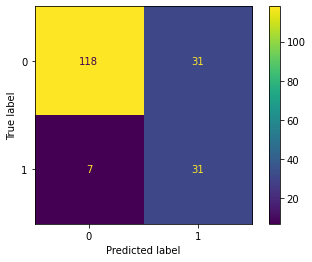

In [60]:
%%time
pipe = Pipeline(steps=[
    ('tfidf', TfidfVectorizer()),
    ("clf", LogisticRegression(
        C=5,
        penalty="l1", 
        class_weight="balanced", 
        solver="liblinear", 
        random_state=0))
])
pipe.fit(X_train["text"], y_train)
ixs = np.where(pipe["clf"].coef_>0)[1]
cols = [k for k, v in pipe["tfidf"].vocabulary_.items() if v in ixs]
print(len(cols), cols)
ixs = np.where(pipe["clf"].coef_<0)[1]
cols = [k for k, v in pipe["tfidf"].vocabulary_.items() if v in ixs]
print(len(cols), cols)
plot_confusion_matrix(pipe, X_test["text"], y_test);

In [34]:
rel_columns = ['doc_clean',
 'topic_0',
 'topic_1',
 'topic_2',
 'topic_3',
 'topic_4',
 'topic_5']

In [35]:
train_set_c1 = weighted_cluster_1[rel_columns]
train_set_c2 = weighted_cluster_2[rel_columns]
train_set_c3 = weighted_cluster_3[rel_columns]

In [36]:
test_set = df_docs_outside["doc_clean"]

In [37]:
for j in range(3):    
    train_set = [train_set_c1, train_set_c2, train_set_c3][j]
    print(f" --Cluster {j}--")
    print("Size:", train_set.shape[0])
    for i in range(6):
        print(f"Size topic {i}:", train_set[train_set[f"topic_{i}"]>0].shape[0])

 --Cluster 0--
Size: 89
Size topic 0: 9
Size topic 1: 16
Size topic 2: 13
Size topic 3: 6
Size topic 4: 7
Size topic 5: 9
 --Cluster 1--
Size: 57
Size topic 0: 8
Size topic 1: 3
Size topic 2: 11
Size topic 3: 6
Size topic 4: 8
Size topic 5: 7
 --Cluster 2--
Size: 43
Size topic 0: 8
Size topic 1: 7
Size topic 2: 4
Size topic 3: 4
Size topic 4: 6
Size topic 5: 6


In [145]:
t = 1
train_set_c1_t0 = train_set_c1[f"doc_clean topic_{t}".split()].copy()
train_set_c1_t0["text"] = train_set_c1_t0["doc_clean"].apply(lambda x: " ".join(x))
train_set_c1_t0["y"] = (train_set_c1_t0[f"topic_{t}"]>0).astype(int)
train_set_c1_t0

,doc_clean,topic_1,text,y
0,"[student, learn, implicit, explicit, non, exis...",0.000000,student learn implicit explicit non existent c...,0
1,"[competence, base, approach, organizational, i...",0.000000,competence base approach organizational indivi...,0
2,"[develop, key, competency, project, base, lear...",0.000000,develop key competency project base learning g...,0
3,"[competency, professionals, empirical, study, ...",0.000000,competency professionals empirical study key c...,0
4,"[coach, prepare, student, school, work, transi...",0.000000,coach prepare student school work transition c...,0
...,...,...,...,...
84,"[evaluate, assessment, quality, competence, ba...",0.284201,evaluate assessment quality competence base ed...,1
85,"[export, failure, strange, case, national, voc...",0.319629,export failure strange case national vocationa...,1
86,"[reconsider, competence, attempt, david, bridg...",0.000000,reconsider competence attempt david bridges ju...,0
87,"[competence, base, education, training, progre...",0.228439,competence base education training progress vi...,1


In [146]:
train_set_c1_t0["y"].value_counts()

0    73
1    16
Name: y, dtype: int64

In [78]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.pipeline import Pipeline
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import plot_confusion_matrix
import numpy as np

['sustainable_development', 'development_goal', 'competence', 'assessment', 'mobile', 'policy', 'covid', '19', 'culinary', 'vocational', 'european', 'hope', 'narrative', 'movement', 'philosophy', 'competence_movement', 'philosophy_education', 'practical_competence']
Wall time: 114 ms


C:\Users\felip\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


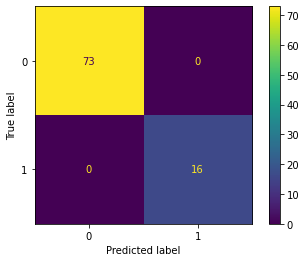

In [147]:
%%time
pipe = Pipeline(steps=[
    ('tfidf', TfidfVectorizer()),
    ("clf", LogisticRegression(
        C=15,
        penalty="l1", 
        class_weight="balanced", 
        solver="liblinear", 
        random_state=0))
])
pipe.fit(train_set_c1_t0["text"], train_set_c1_t0["y"])
ixs = np.where(pipe["clf"].coef_>0)[1]
cols = [k for k, v in pipe["tfidf"].vocabulary_.items() if v in ixs]
print(cols)
plot_confusion_matrix(pipe, train_set_c1_t0["text"], train_set_c1_t0["y"]);